In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import maboss

In [3]:
outputs = ['Apoptosis', 'Invasion']

### We simulate the Notch++ p53-- mutation for the invasion model

In [4]:
simulation = maboss.Ensemble(
    path="Invasion",
    individual_results=True,
)

simulation.param.update({
    'sample_count': 100000,
    'thread_count': 6,
    'max_time': 50,
    'time_tick': 1
})

simulation.set_outputs(outputs)
simulation.mutate("NICD", "ON")
simulation.mutate("p53", "OFF")
simulation.set_istate("DNAdamage", (0.5, 0.5))
simulation.set_istate("ECMicroenv", (0.5, 0.5))

result = simulation.run()

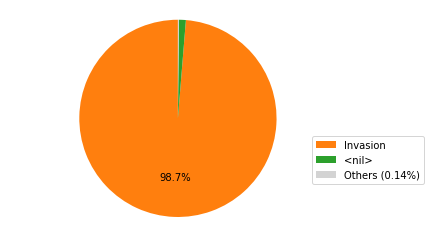

In [5]:
result.plot_piechart()

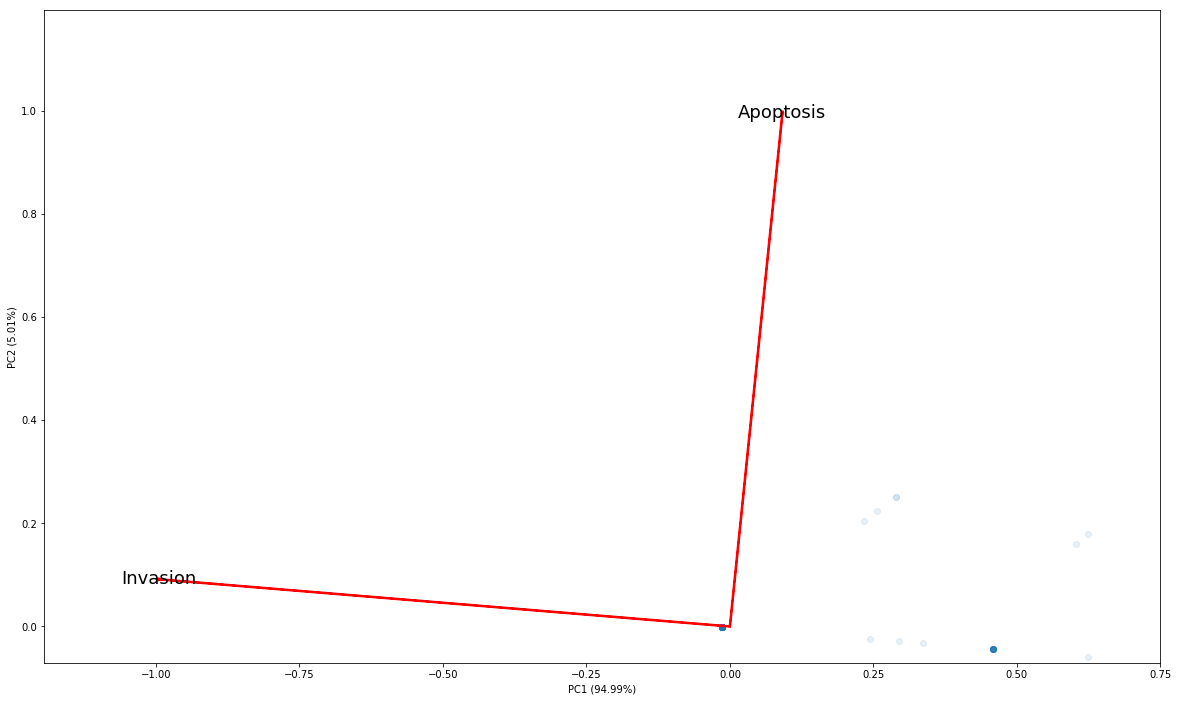

In [6]:
result.plotSteadyStatesNodesDistribution()

In [7]:
indices, labels = result.getKMeans(4)

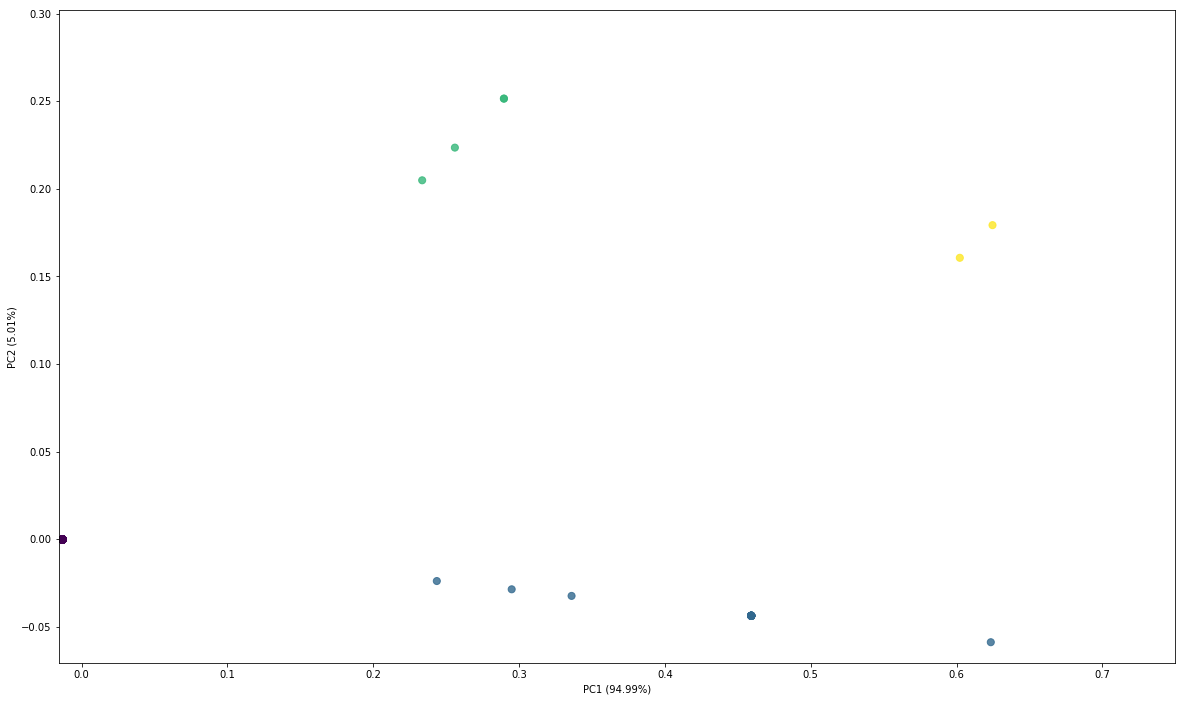

In [8]:
result.plotSteadyStatesNodesDistribution(labels=labels, show_features=False)

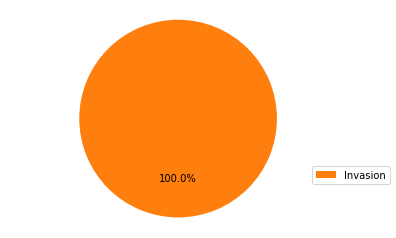

In [9]:
result.filterEnsembleByCluster("Cluster_1", indices[0])

simulation_c1 = simulation.copy()
simulation_c1.set_models_path("Cluster_1")

result_c1 = simulation_c1.run()
result_c1.plot_piechart()

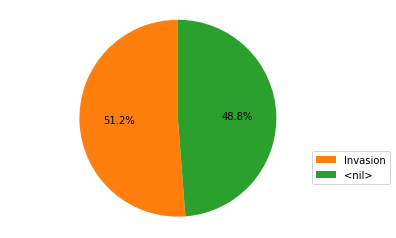

In [10]:
result.filterEnsembleByCluster("Cluster_2", indices[1])

simulation_c2 = simulation.copy()
simulation_c2.set_models_path("Cluster_2")

result_c2 = simulation_c2.run()
result_c2.plot_piechart()

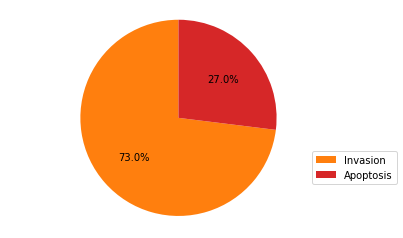

In [11]:
result.filterEnsembleByCluster("Cluster_3", indices[2])

simulation_c3 = simulation.copy()
simulation_c3.set_models_path("Cluster_3")

result_c3 = simulation_c3.run()
result_c3.plot_piechart()

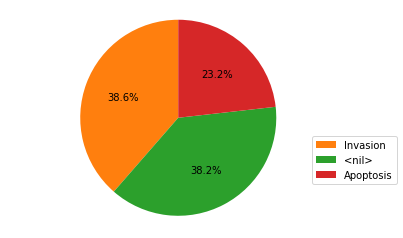

In [12]:
result.filterEnsembleByCluster("Cluster_4", indices[3])

simulation_c4 = simulation.copy()
simulation_c4.set_models_path("Cluster_4")

result_c4 = simulation_c4.run()
result_c4.plot_piechart()

### Comparing with wild type

In [14]:
simulation_wt = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=100000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=outputs,
    individual_results=True,
    random_sampling=True
)
simulation_wt.palette = simulation.palette
result_wt = simulation_wt.run()

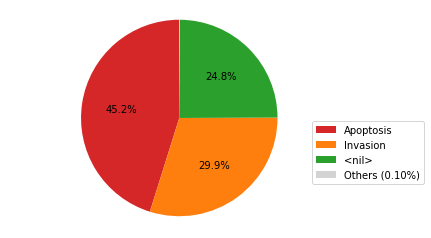

In [15]:
result_wt.plot_piechart()